In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('results.csv')



# Printing the sample head
print(data.head())

   id    name      input compiler  threads      real       usr       sys  \
0   1  ferret     simdev      gcc        1  0m0.023s  0m0.030s  0m0.005s   
1   2  ferret   simsmall      gcc        1  0m0.395s  0m0.343s  0m0.017s   
2   3  ferret  simmedium      gcc        1  0m1.470s  0m1.345s  0m0.052s   
3   4  ferret   simlarge      gcc        1  0m6.867s  0m6.535s  0m0.145s   
4   5  ferret     native      gcc        1  6m50.895  6m40.672  0m1.619s   

   cores  
0      1  
1      1  
2      1  
3      1  
4      1  


In [4]:
# Converting execution time to milliseconds

def convertExecutionTime(time):
    MIN_TO_MIL_SECONDS = 60000
    SECONDS_TO_MIL_SECONDS = 1000
    min,seconds = time.split('m')
    seconds = seconds.replace('s','')
    min = int(min) 
    seconds = float(seconds)
    fullTimeinMilliseconds = int(min * MIN_TO_MIL_SECONDS + seconds * SECONDS_TO_MIL_SECONDS) 
    return fullTimeinMilliseconds

data['real'] = data['real'].apply(convertExecutionTime)
data['usr'] = data['usr'].apply(convertExecutionTime)
data['sys'] = data['sys'].apply(convertExecutionTime)



In [5]:
print(data.describe())

                id      threads           real            usr           sys  \
count  3855.000000  3855.000000    3855.000000    3855.000000   3855.000000   
mean   1928.000000    10.463035   38554.242542   44830.111284   1485.290013   
std    1112.986972    10.824693   88747.774795  112770.703391   4259.727504   
min       1.000000     1.000000       4.000000       0.000000      1.000000   
25%     964.500000     2.000000     260.500000     227.000000     18.000000   
50%    1928.000000     4.000000    1122.000000    1185.000000     45.000000   
75%    2891.500000    16.000000    9116.000000    7515.500000    747.500000   
max    3855.000000    32.000000  420039.000000  413117.000000  28688.000000   

             cores  
count  3855.000000  
mean     16.439689  
std       9.266701  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      32.000000  


In [6]:
# plt.scatter(x,y, c='b', marker='x', label='1')
# plt.scatter(x, y, c='r', marker='s', label='-1')
# plt.legend(loc='upper left')
# plt.show()

data.loc[data['name'] == "ferret"]

,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


In [7]:
# Plottting charts for gcc-compiler based implementations

c1data = data.loc[data['compiler'] == "gcc"]
c1data


,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
1925,1926,dedup,simdev,gcc,1,115,63,35,1
1926,1927,dedup,simsmall,gcc,1,754,396,331,1
1927,1928,dedup,simmedium,gcc,1,2341,1287,963,1
1928,1929,dedup,simlarge,gcc,1,14553,8258,6102,1
1929,1930,dedup,native,gcc,1,47432,26080,21023,1


array(['simdev', 'simsmall', 'simmedium', 'simlarge', 'native'],
      dtype=object)

<Figure size 432x288 with 0 Axes>

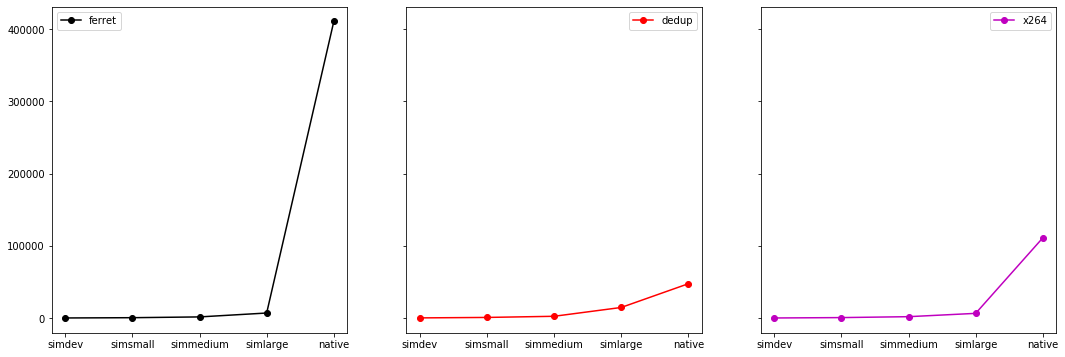

In [8]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axs[0].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "ferret"])['real'],'ko-',label='ferret') #no need for str(x_axis)
axs[1].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "dedup"])['real'],'ro-',label='dedup') 
axs[2].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "x264"])['real'],'mo-',label='x264') 
axs[0].legend()
axs[1].legend()
axs[2].legend()

c1data['input'].unique()


In [9]:
# Visualizations for ferret benchmark

ferretData =data.loc[(data['name'] == "ferret") & (data['compiler'] != "gcc")]
ferretData



,id,name,input,compiler,threads,real,usr,sys,cores
5,6,ferret,simdev,gcc-pthreads,1,23,30,4,1
6,7,ferret,simsmall,gcc-pthreads,1,425,374,13,1
7,8,ferret,simmedium,gcc-pthreads,1,1337,1232,52,1
8,9,ferret,simlarge,gcc-pthreads,1,6560,6258,123,1
9,10,ferret,native,gcc-pthreads,1,420039,406024,2610,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


In [31]:
# Chart info : compiler is gcc-pthreads, change cores, number of threads = 1 
# x axis = number of cores
# y axis = execution time


# x axis ticks 
x_axis = ferretData['cores'].unique()

# phtread version
ferretData =ferretData.loc[ferretData['compiler'] == "gcc-pthreads"]
ferretData


,id,name,input,compiler,threads,real,usr,sys,cores
5,6,ferret,simdev,gcc-pthreads,1,23,30,4,1
6,7,ferret,simsmall,gcc-pthreads,1,425,374,13,1
7,8,ferret,simmedium,gcc-pthreads,1,1337,1232,52,1
8,9,ferret,simlarge,gcc-pthreads,1,6560,6258,123,1
9,10,ferret,native,gcc-pthreads,1,420039,406024,2610,1
...,...,...,...,...,...,...,...,...,...
960,961,ferret,simdev,gcc-pthreads,32,22,28,6,32
961,962,ferret,simsmall,gcc-pthreads,32,280,367,14,32
962,963,ferret,simmedium,gcc-pthreads,32,772,1238,53,32
963,964,ferret,simlarge,gcc-pthreads,32,3073,6606,133,32


In [32]:
inputCombinationData = ferretData.loc[(ferretData['input'] == "simsmall") ]
inputCombinationData
(inputCombinationData.loc[inputCombinationData['threads'] == 2])['real']

166    421
171    301
176    272
181    286
186    282
191    271
196    283
201    258
206    285
211    262
216    281
221    267
226    261
231    264
236    272
241    265
246    273
251    261
256    262
261    271
266    254
271    261
276    258
281    253
286    264
291    292
296    260
301    276
306    259
311    260
316    265
321    251
Name: real, dtype: int64

<Figure size 1440x1440 with 0 Axes>

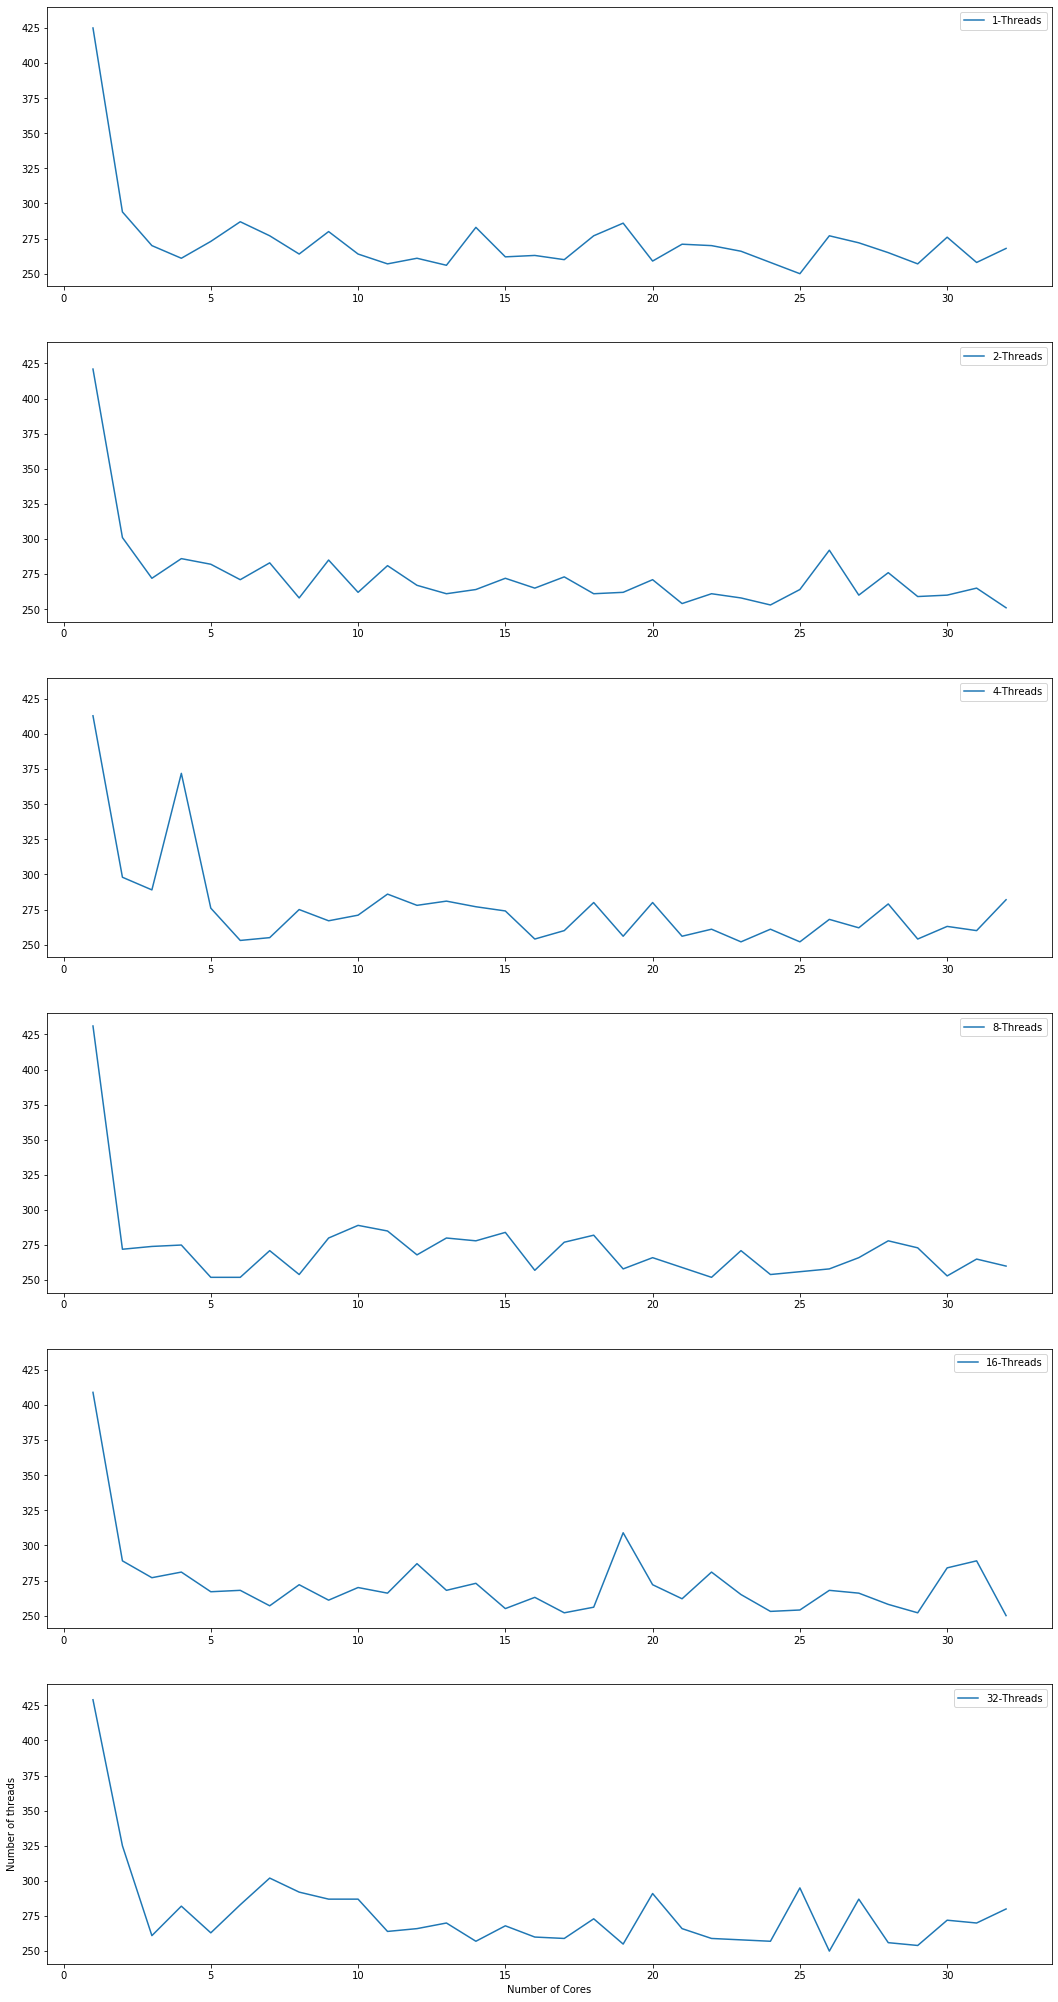

In [74]:

fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(6, 1, figsize=(18, 36), sharey=True)
# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 1])['real'],label='1 thread') #no need for str(x_axis)

# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 2])['real'],label='2 threaded') #no need for str(x_axis)
# axs[0,0].legend()

combinations = [1,2,4,8,16,32]

def drawMatrixChartForInputs(axs,combinations,multiline,title):
    i = 0
    for combination in combinations:
        axs[i].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == combination])['real'],label=(str(combination)+"-"+multiline))
        axs[i].legend()
        i = i +1
    
    plt.xlabel('Number of Cores')
    plt.ylabel("Number of threads")
    
drawChartForInputs(axs,combinations,'Threads',"How execution time changes when threads and cores get change")

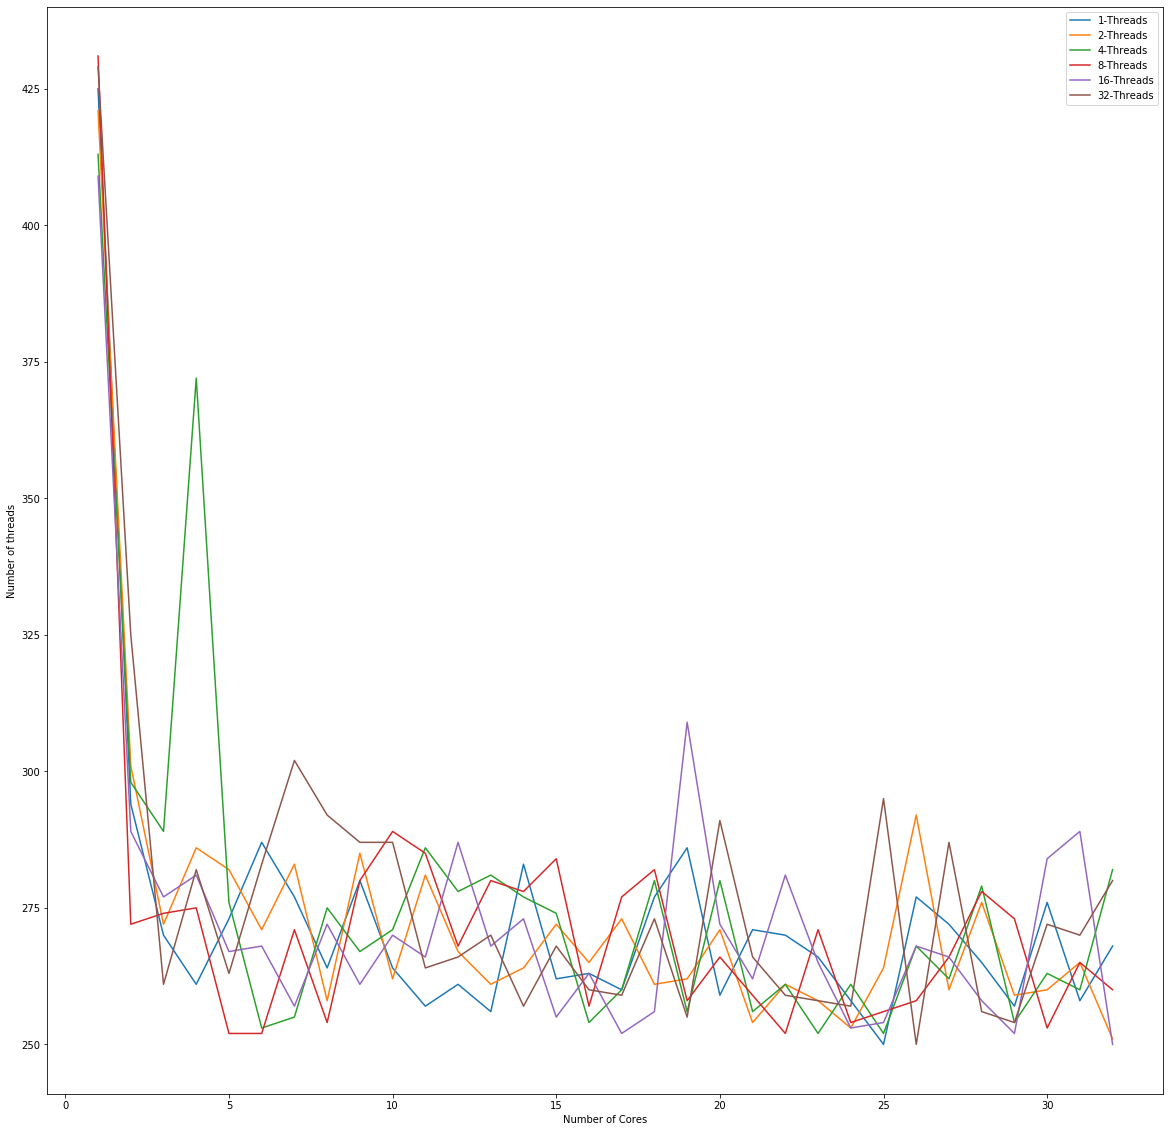

In [76]:
def drawChartForInputs(axs,combinations,multiline,title):
    plt.rcParams["figure.figsize"] = (20,20)
    for combination in combinations:
        plt.plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == combination])['real'],label=(str(combination)+"-"+multiline))
      

    plt.xlabel('Number of Cores')
    plt.ylabel("Number of threads")
    plt.legend()

drawChartForInputs(axs,combinations,'Threads',"How execution time changes when threads and cores get change")